# Scipy - Optimization

In [1]:
import addutils.toc ; addutils.toc.js(ipy_notebook=True)

In [2]:
import bokeh.plotting as bk
from addutils import css_notebook
css_notebook()

In [3]:
bk.output_notebook()

Loading BokehJS ...

## 1 Brief Introduction to Optimization

### 1.1 Dimensionality of the problem

The scale of an optimization problem is pretty much set by the dimensionality of the problem, i.e. the number of scalar variables on which the search is performed.

### 1.2 Convex versus non-convex optimization

Convex functions can be optimized easily with gradient-descent algorithms. Non-convex functions optimization problems are much more difficult, expecially for higher dimensionality problems. This second class of optimization problems are not analyzed in this brief tutorial but are part of a specialised course.

<div style="float:left;"><img src="images/convex_function.png"><br />Convex function</div>
<div><img src="images/non_convex_function.png"><br />Non Convex Function</div>

### 1.3 Smooth and non-smooth problems

In a smooth problem the gradient is defined everywhere: this helps in speeding-up the optimization algorithms.

<div style="float:left;"><img src="images/smooth_function.png"><br />Smooth function</div>
<div><img src="images/non_smooth_function.png"><br />Non Smooth Function</div>

## 2 A Simpe Optimization Example

The `scipy.optimize` module provides useful algorithms for function minimization (scalar or multi-dimensional), curve fitting and root finding.

Let's find the minimum of this simple smooth non-convex function:

In [4]:
from scipy import optimize
import numpy as np

def f(x):
    return x**2 + 10*np.sin(x)

x = np.arange(-10, 10, 0.1)

fig = bk.figure()
fig.plot_height = 600
fig.plot_width = 600
fig.line(x, f(x))
bk.show(fig)

This function has a global minimum around -1.3 and a local minimum around 3.8.

The general and efficient way to find a minimum for this function is to conduct a gradient descent starting from a given initial point. The [BFGS](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_bfgs.html?highlight=bfgs#scipy.optimize.fmin_bfgs) (quasi-Newton method of Broyden, Fletcher, Goldfarb, and Shanno) algorithm is a good way of doing this:

In [5]:
optimize.fmin_bfgs(f, 0)

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6


array([-1.30644012])

A possible issue with this approach is that, if the function has local minima, the algorithm may find these local minima instead of the global minimum. `scipy.optimize.anneal()` provides an alternative, using simulated annealing. More efficient algorithms for different classes of global optimization problems exist, but this is out of the scope of scipy. Some useful packages for global optimization are [OpenOpt](https://web.archive.org/web/20150825045301/http://openopt.org/Welcome), [PyGMO](https://esa.github.io/pygmo/) and [PyEvolve](http://pyevolve.sourceforge.net/).

## 3 Finding the roots of a scalar function

To find a root, i.e. a point where `f(x) = 0`, of the function f above we can use for example `scipy.optimize.fsolve()`:

In [6]:
root = optimize.fsolve(f, 1)
root

array([0.])

Note that only one root is found. Inspecting the plot of f reveals that there is a second root around -2.5. We find the exact value of it by adjusting our initial guess:

In [7]:
root2 = optimize.fsolve(f, -2.5)
root2

array([-2.47948183])

## 4 Curve Fitting

Suppose we have data sampled from `f` with some noise:

In [8]:
xdata = np.linspace(-10, 10, num=20)
ydata = f(xdata) + np.random.randn(xdata.size)

Now if we know the functional form of the function from which the samples were drawn (`x^2 + sin(x)` in this case) but not the amplitudes of the terms, we can find those by least squares curve fitting. First we have to define the function to fit:

In [9]:
def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

Then we can use `scipy.optimize.curve_fit()` to find `a` and `b`:

In [10]:
guess = [2, 2]
params, params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)

grid = (-10, 10, 0.1)
xmin_global = optimize.brute(f, (grid,))
xmin_local = optimize.fminbound(f, 0, 10)

fig = bk.figure(title=None)
fig.line(x, f(x), color='blue', line_width=2, legend="f(x)")
fig.line(x, f2(x, *params), color='red', line_width=2, line_dash=[5], legend="Curve fit result")

xmins = np.array([xmin_global[0], xmin_local])

fig.circle(xmins, f(xmins), size=9, color='green', legend="Minima")

roots = np.array([root[0], root2[0]])

fig.triangle(roots, f(roots), size=9, color="black", legend="Roots")
fig.xaxis[0].axis_label = 'x'
fig.yaxis[0].axis_label = 'f(x)'
bk.show(fig)


## 5 Optimizing with Box-Bound Constraints

Box bounds correspond to limiting each of the individual parameters of the optimization. Note that some problems that are not originally written as box bounds can be rewritten as such be a change of variables.

* `scipy.optimize.fminbound()` for 1D-optimization
* `scipy.optimize.fmin_l_bfgs_b()` a quasi-Newton method with bound constraints

In [11]:
import warnings
warnings.filterwarnings('ignore', category=UnicodeWarning)

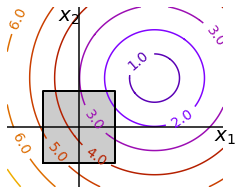

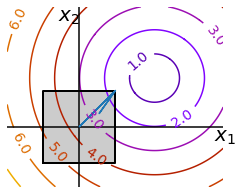

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

x, y = np.mgrid[-2.9:5.8:.05, -2.5:5:.05]
x = x.T
y = y.T

for i in (1, 2):
    # Create 2 figure: only the second one will have the optimization
    # path
    plt.figure(i, figsize=(3, 2.5))
    plt.clf()
    plt.axes([0, 0, 1, 1])

    contours = plt.contour(np.sqrt((x - 3)**2 + (y - 2)**2),
                           extent=[-3, 6, -2.5, 5], cmap=plt.cm.gnuplot)
    plt.clabel(contours, inline=1, fmt='%1.1f', fontsize=14)

    plt.plot([-1.5, -1.5,  1.5,  1.5, -1.5],
             [-1.5,  1.5,  1.5, -1.5, -1.5], 'k', linewidth=2)
    plt.fill_between([ -1.5,  1.5],
                     [ -1.5, -1.5],
                     [  1.5,  1.5],
                     color='.8')
    plt.axvline(0, color='k')
    plt.axhline(0, color='k')

    plt.text(-.9, 4.4, '$x_2$', size=20)
    plt.text(5.6, -.6, '$x_1$', size=20)
    plt.axis('equal')
    plt.axis('off')

# And now plot the optimization path
accumulator = list()

def f(x):
    # Store the list of function calls
    accumulator.append(x)
    return np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)

# We don't use the gradient, as with the gradient, L-BFGS is too fast,
# and finds the optimum without showing us a pretty path
def f_prime(x):
    r = np.sqrt((x[0] - 3)**2 + (x[0] - 2)**2)
    return np.array(((x[0] - 3)/r, (x[0] - 2)/r))

optimize.fmin_l_bfgs_b(f, np.array([0, 0]), approx_grad=1,
                       bounds=((-1.5, 1.5), (-1.5, 1.5)))

accumulated = np.array(accumulator)
plt.plot(accumulated[:, 0], accumulated[:, 1])

---

Visit [www.add-for.com](<http://www.add-for.com/IT>) for more tutorials and updates.

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.